# Modelo de Árbol de Regresión para la predicción de la duración de los quirófanos.
 ## Análisis del rendimiento del modelo.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [17]:
# Imports necesarios
from regressionTree import RegressionTree
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
import Utils.common as common

In [18]:
# Carga de datos
data = common.FileToDataframe('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_Codificado.xlsx')
data = common.eliminarOutliers(data)

In [19]:
X, Y = common.divideData(data)

In [20]:
# Realizamos el árbol de regresión
model = RegressionTree(X,Y)

In [21]:
# Mostramos los resultados
print("MAE: ", model.getMAE())
print("MSE: ", model.getMSE())
print("RMSE: ", model.getRMSE())

MAE:  33.4763848946348
MSE:  2143.103869464334
RMSE:  46.29366986386297


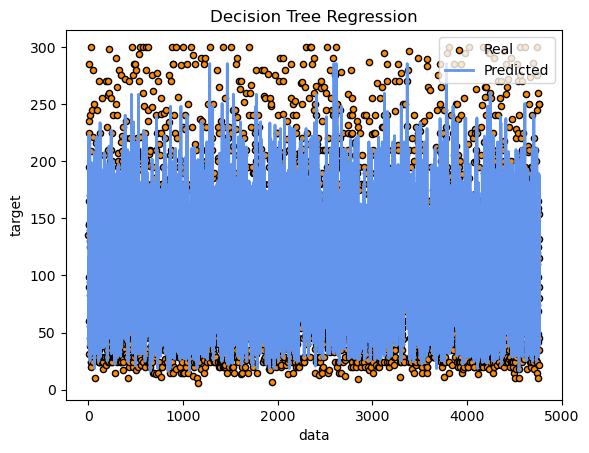

In [22]:
model.drawPerformance()

In [23]:
# Exportamos el modelo
model.exportModel('regressionTree.pkl')

In [24]:
# Importamos el ampliado
data = common.FileToDataframe('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_PLASTICA_Codificado.xlsx')
data = common.eliminarOutliers(data)

In [25]:
X, Y = common.divideDataAmpli(data)

c:\Users\Jesus\OneDrive\Ingeniería\Cuarto\TFG\GestorQuirofanos\Modelos\Árboles\..\Utils\common.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Código diagnóstico'] = data['Código diagnóstico'].astype(float)


In [26]:
model = RegressionTree(X,Y)

In [27]:
print("MSE: ", model.getMSE())
print("RMSE: ", model.getRMSE())

MSE:  1792.011478309771
RMSE:  42.33215655160709


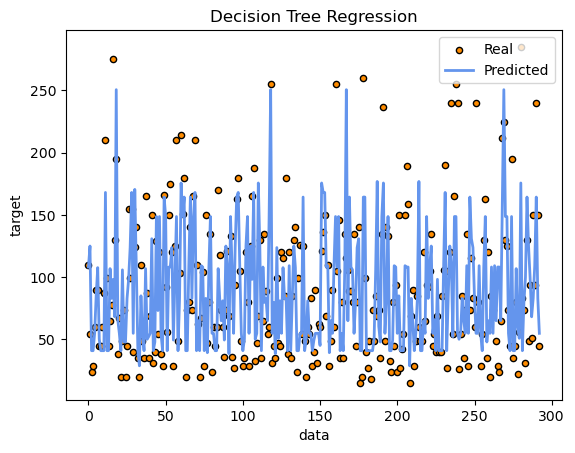

In [28]:
model.drawPerformance()

In [29]:
# Exportamos el modelo
model.exportModel('regressionTree_PlASTICA.pkl')
from sklearn.tree import export_graphviz
export_graphviz(model.best_model, out_file='regressionTree.dot', feature_names=data.drop(['DURACIÓN','NHC'], axis=1).columns, filled=True, rounded=True, special_characters=True)

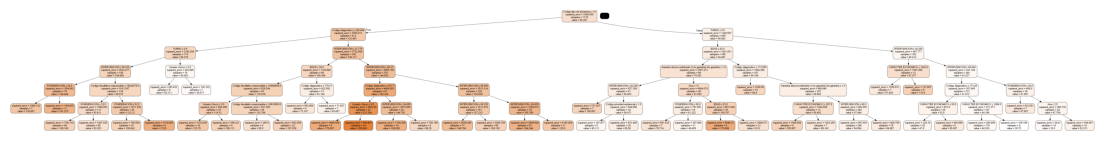

In [31]:
# Lo convertimos a png
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
# Nos colocamos en la carpeta donde está el dot
(graph,) = pydot.graph_from_dot_file('regressionTree.dot')
# Exportamos el png
graph.write_png('regressionTree.png')
# Lo mostramos
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('regressionTree.png'))
plt.axis('off');
plt.show();